In [342]:
import pandas as pd
import numpy as np
##Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [343]:
transact=pd.read_excel('Transaction dataset.xlsx')

In [344]:
transact.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [345]:
#Number of columns in the dataset and their type
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [346]:
#Timeline of dataset: 3months
transact['extraction']

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

# Calculating the Annual Salary

In [347]:
#Focussing on the dataset having salary as transaction mode
to=transact[transact['txn_description']== 'PAY/SALARY']
to

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit


In [348]:
#Salary account has always posted transactions, 100% settled and safe.also because only credit transactions
to['status'].unique()

array(['posted'], dtype=object)

In [349]:
#Just one account to analyse the dataset and trend of transaction mode: Salary
#Salary credited is constant for each customer per month,can infer annual salary.
to[to['account']=='ACC-1598451071']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
72,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit
951,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-08T14:00:00.000+0000,1013.67,3fb647f098a642809f85f2f08c0e589b,Australia,CUS-2487424745,NaN,credit
1849,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-15T14:00:00.000+0000,1013.67,bdff41213228441e998c82d263983cc7,Australia,CUS-2487424745,NaN,credit
2642,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-22T14:00:00.000+0000,1013.67,72e4010a18564f15a097c97af6d309bc,Australia,CUS-2487424745,NaN,credit
3575,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-29T14:00:00.000+0000,1013.67,44941fc90d514b71990c07c2c09ce22a,Australia,CUS-2487424745,NaN,credit
4523,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-09-05T14:00:00.000+0000,1013.67,ba87ffc60b7346f8b726e8857e3ecacb,Australia,CUS-2487424745,NaN,credit
5443,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-09-12T14:00:00.000+0000,1013.67,25cf76b489414f6cac603e69aad03f9d,Australia,CUS-2487424745,NaN,credit
6393,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-09-19T14:00:00.000+0000,1013.67,63a5b2fc882e4a3a9704be310b85225d,Australia,CUS-2487424745,NaN,credit
7314,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-09-26T14:00:00.000+0000,1013.67,417263ea35184ef7b379496745031956,Australia,CUS-2487424745,NaN,credit
8269,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-10-03T14:00:00.000+0000,1013.67,f5026b5d7675414092f453c2224ffaa7,Australia,CUS-2487424745,NaN,credit


In [350]:
#No debit transaction in Salary Account,all salary transactions are added and form a part of Salary of a customer
to=transact[transact['txn_description']== 'PAY/SALARY']
to[to['movement']=='debit'] 

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


In [351]:
#Convert to Dataframe
to=pd.DataFrame(to)

In [352]:
#Total salary per account over the analysis time period (1st Aug to 31st October)3 months,
#sum of amount credited to the account
salo=to.groupby('account').sum()
salo

,card_present_flag,merchant_code,balance,age,amount
account,,,,,
ACC-1037050564,0.0,0.0,51472.20,520,11597.17
ACC-1056639002,0.0,0.0,298308.49,132,19170.06
ACC-1199531521,0.0,0.0,86898.05,364,26500.46
ACC-1217063613,0.0,0.0,13769.63,54,9727.24
ACC-1222300524,0.0,0.0,22826.60,494,13027.69
...,...,...,...,...,...
ACC-854938045,0.0,0.0,88169.32,196,17770.76
ACC-90814749,0.0,0.0,65301.33,210,13852.02
ACC-958000567,0.0,0.0,59807.25,238,24623.27


In [353]:
#Annual salary can be calculated as transaction amount (salary) is constant credit amount over 3 months
salo['salaryy_annual']=(salo.amount/3)*12
salo['salaryy_annual']

account
ACC-1037050564     46388.68
ACC-1056639002     76680.24
ACC-1199531521    106001.84
ACC-1217063613     38908.96
ACC-1222300524     52110.76
                    ...    
ACC-854938045      71083.04
ACC-90814749       55408.08
ACC-958000567      98493.08
ACC-964839203      81130.40
ACC-966140392      72041.48
Name: salaryy_annual, Length: 100, dtype: float64

In [354]:
#Dataframe consisiting of annual Salary of each account
salory=salo['salaryy_annual']
salory=pd.DataFrame(salory)
salory

,salaryy_annual
account,
ACC-1037050564,46388.68
ACC-1056639002,76680.24
ACC-1199531521,106001.84
ACC-1217063613,38908.96
ACC-1222300524,52110.76
...,...
ACC-854938045,71083.04
ACC-90814749,55408.08
ACC-958000567,98493.08


In [355]:
#Merge annual salary with original df using account as common column
final=pd.merge(transact, salory, on="account")
final

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,salaryy_annual
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,56765.52
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,56765.52
2,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,56765.52
3,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NaN,Diana,...,Byron Bay,NSW,2018-08-01T08:09:42.000+0000,14.10,1c12c9ad77894ef8b507fb091e41e928,Australia,CUS-2487424745,153.6 -28.63,debit,56765.52
4,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,NaN,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit,56765.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,posted,NaN,0,ACC-240804743,AUD,121.48 -30.75,PAY/SALARY,NaN,0.0,Kenneth,...,NaN,NaN,2018-10-29T11:00:00.000+0000,4405.30,d3bb8b156aa64be9a02eccba98f09435,Australia,CUS-261674136,NaN,credit,123348.40
12039,posted,NaN,NaN,ACC-240804743,AUD,121.48 -30.75,PHONE BANK,NaN,NaN,Kenneth,...,NaN,NaN,2018-10-30T03:00:00.000+0000,43.00,db9abbbe8d214174b79ff65ca421b0da,Australia,CUS-261674136,NaN,debit,123348.40
12040,authorized,1.0,NaN,ACC-240804743,AUD,121.48 -30.75,SALES-POS,e28c426d-cbef-4e2d-aa06-1ba0b6b1902f,NaN,Kenneth,...,Boggabri,NSW,2018-10-30T21:27:03.000+0000,16.33,02eb25c2447d4287bc5f62950f63130c,Australia,CUS-261674136,150.04 -30.7,debit,123348.40
12041,posted,NaN,NaN,ACC-240804743,AUD,121.48 -30.75,PAYMENT,NaN,NaN,Kenneth,...,NaN,NaN,2018-10-31T14:00:00.000+0000,56.00,1e4115fe5c8f4f74be8f9ddcd4ab3e8d,Australia,CUS-261674136,NaN,debit,123348.40


array([[<AxesSubplot:title={'center':'salaryy_annual'}>]], dtype=object)

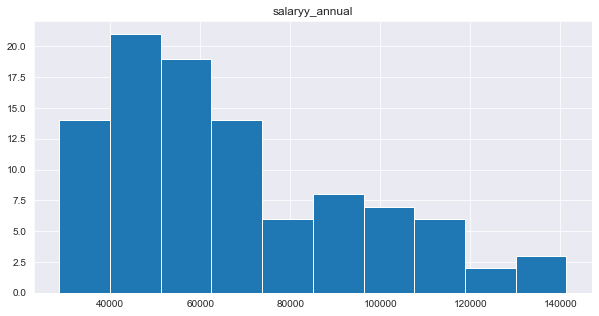

In [356]:
#Trend of annual Salary of the customers in the dataset(in AUD)
salory.hist(bins=10,figsize=(10,5))

Annual Salary of all the customers of the dataset. Maximum number of people have annual salaries at around 40-50 thousand,following a gradual decline and a steep decline after 70,000 pa.

# Convert Categorical Variables and Cleaning Dataset

In [357]:
#Convert txn_description,gender and status into dummy variables
desc=pd.get_dummies(transact['txn_description'],drop_first=True)
desc
Gender=pd.get_dummies(transact['gender'],drop_first=True)
Gender
status=pd.get_dummies(transact['status'],drop_first=True)
status

,posted
0,0
1,0
2,0
3,0
4,0
...,...
12038,0
12039,0
12040,0
12041,0


In [358]:
#Concatenating all the df's
final_df=pd.concat([final,desc,Gender,status],axis=1)
final_df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
salaryy_annual           0
PAY/SALARY               0
PAYMENT                  0
PHONE BANK               0
POS                      0
SALES-POS                0
M                        0
posted                   0
dtype: int64

In [359]:
#Impute null values with mode as they are categorical variables or binary variables
final_df['merchant_state']=final_df['merchant_state'].fillna(value='NSW')
final_df['card_present_flag']=final_df['card_present_flag'].fillna(value=1.0)
final_df['merchant_suburb']=final_df['merchant_suburb'].fillna(value='Melbourne')

In [360]:
final_df['merchant_suburb'].mode()

0    Melbourne
dtype: object

In [361]:
#Merchant null values removed
final_df['merchant_state'].isnull().sum()

0

In [362]:
#Remove redunant columns or columns with high null values which cant be imputed or columns not used for our analysis
final_df.drop(['bpay_biller_code', 'merchant_code','country','transaction_id','currency','merchant_id',
              'merchant_long_lat'], axis=1, inplace=True)

In [363]:
#Cleaned dataset
final_df.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
customer_id          0
movement             0
salaryy_annual       0
PAY/SALARY           0
PAYMENT              0
PHONE BANK           0
POS                  0
SALES-POS            0
M                    0
posted               0
dtype: int64

# Relationship of Annual Salaries with other Attributes

In [364]:
#Correlation of annual salary with other customer attributes
Salary_corr= final_df.corr()['salaryy_annual']
Salary_corr
Sc=pd.DataFrame(Salary_corr)
Sc

,salaryy_annual
card_present_flag,0.031777
balance,0.253089
age,0.026425
amount,0.091213
salaryy_annual,1.000000
PAY/SALARY,-0.007488
PAYMENT,-0.011356
PHONE BANK,0.005010
POS,0.004096
SALES-POS,0.008990


<AxesSubplot:>

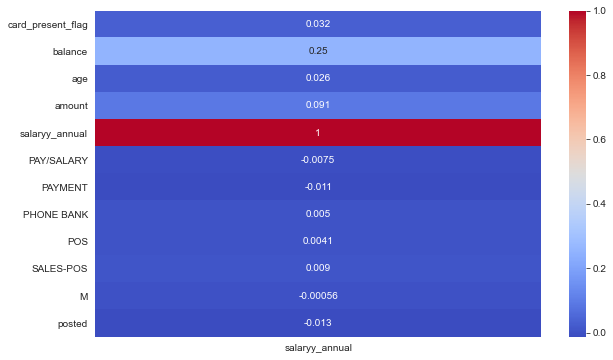

In [365]:
plt.figure(figsize=(10,6))
sns.heatmap(Sc,annot=True,cmap='coolwarm')

<Figure size 576x720 with 0 Axes>

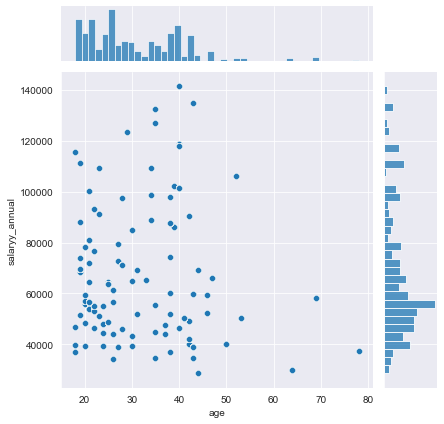

In [366]:
plt.figure(figsize=(8,10))
sns.jointplot(x='age',y='salaryy_annual',data=final_df)

Majority of the customers in the dataset belongs to the age group 20-50,highest annual salary comes from a 40 year old customer.Peak salaries is for the age group of 30-45. Annual Salaries are clustered around 40,000-60,000 Ausie dollars, for people in the age group of 20-30 years,post which the distribution gets more scattered.

In [367]:
plot=pd.concat([final_df['card_present_flag'],final_df['status'],final_df['salaryy_annual'],final_df['age']],axis=1)

In [368]:
age=pd.DataFrame(final_df['age'])
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age['agerange'] = pd.cut(age.age, bins, labels = labels,include_lowest = True)

In [369]:
plot

,card_present_flag,status,salaryy_annual,age
0,1.0,authorized,56765.52,26
1,0.0,authorized,56765.52,26
2,1.0,authorized,56765.52,26
3,1.0,authorized,56765.52,26
4,1.0,posted,56765.52,26
...,...,...,...,...
12038,1.0,posted,123348.40,29
12039,1.0,posted,123348.40,29
12040,1.0,authorized,123348.40,29
12041,1.0,posted,123348.40,29


In [370]:
plott=plot.merge(age,on='age')
plott

,card_present_flag,status,salaryy_annual,age,agerange
0,1.0,authorized,56765.52,26,18-29
1,1.0,authorized,56765.52,26,18-29
2,1.0,authorized,56765.52,26,18-29
3,1.0,authorized,56765.52,26,18-29
4,1.0,authorized,56765.52,26,18-29
...,...,...,...,...,...
6481726,1.0,posted,123348.40,29,18-29
6481727,1.0,posted,123348.40,29,18-29
6481728,1.0,posted,123348.40,29,18-29
6481729,1.0,posted,123348.40,29,18-29


C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='card_present_flag', ylabel='count'>

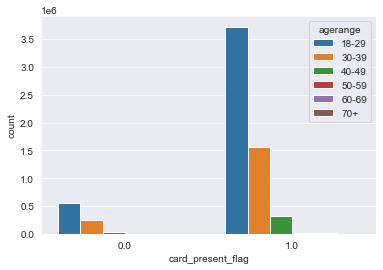

In [371]:
#Attributes with age
sns.countplot(plott['card_present_flag'],hue=plott['agerange'])

<AxesSubplot:xlabel='agerange', ylabel='salaryy_annual'>

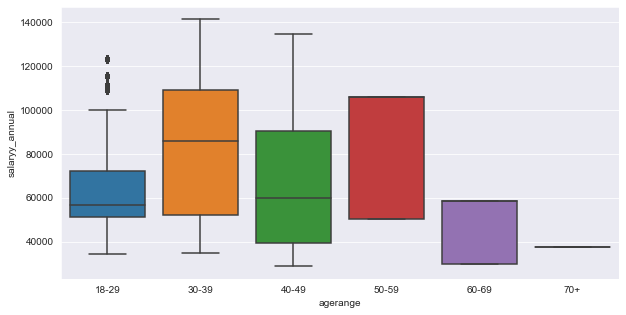

In [372]:
#Relationship of annual salary with age range
plt.figure(figsize=(10,5))
sns.boxplot(data=plott, y="salaryy_annual", x="agerange")

<AxesSubplot:xlabel='gender', ylabel='salaryy_annual'>

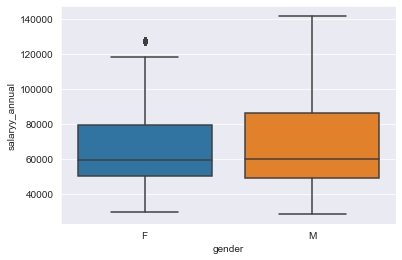

In [373]:
sns.boxplot(x='gender',y='salaryy_annual',data=final_df)

Median annual salary for both female and males are same at 60,000. Higher proportion of males have their annual salaries lying at third quartile as comapred to females. Number of males in the dataset are more than females and the wage disparity starts to show as salary increases. Interestingly, even the upper limit of Males annual salary is not equivalent to the higher outlier of female annual salary. Upper limit of Female annual salary stands at 120,000 while for males its 140,000.

<AxesSubplot:xlabel='txn_description', ylabel='salaryy_annual'>

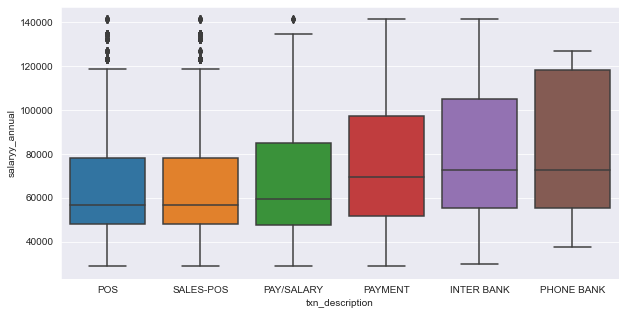

In [374]:
plt.figure(figsize=(10,5))
sns.boxplot(x='txn_description',y='salaryy_annual',data=final_df)

People with higher salary prefer phone bank as their mode of transaction whereas people in the lower end of the annual salary find themselves using POS followed by Salary account as compared to other modes of transaction. Highest variability in annual salary can be observed under payment mode of transaction.

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='movement', ylabel='salaryy_annual'>

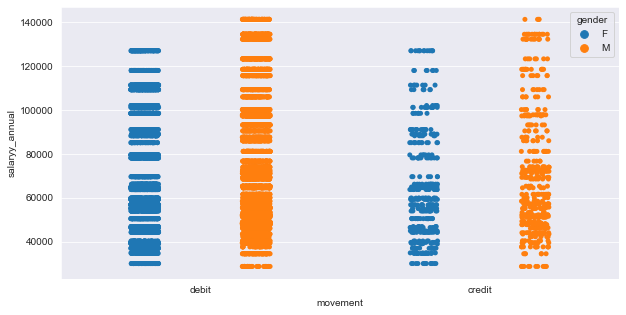

In [375]:
plt.figure(figsize=(10,5))
sns.stripplot(x='movement',y='salaryy_annual',data=final_df,hue='gender',jitter=True,split=True)

Credit transactions are lesser than debit transactions in the dataset. In the range of 40,000- 80,000, men have more concentrated observations of debit transactions after which distributions are more spread out.It could also be the case that since its a card transaction data, more debit cases are observed.

<AxesSubplot:xlabel='merchant_state', ylabel='salaryy_annual'>

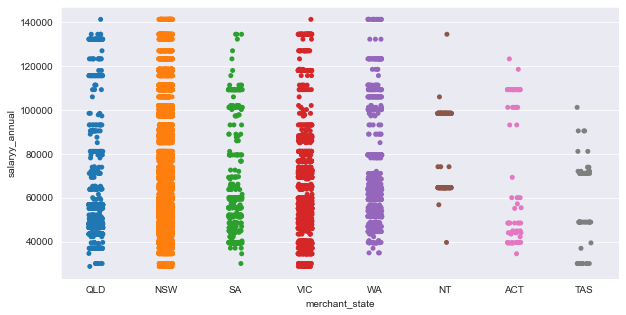

In [376]:
#Merchant state and annual salary 
plt.figure(figsize=(10,5))
sns.stripplot(x='merchant_state',y='salaryy_annual',data=final_df,jitter=True)

People with higher salary can be observed in the merchant states of NSW (New South Wales) and Western Australia implying that these customers might be spending in these areas or using merchant bank services. NT,ACT and TAS states can be ignored for our analysis since no significant activity can be observed in these areas.


<AxesSubplot:xlabel='status', ylabel='salaryy_annual'>

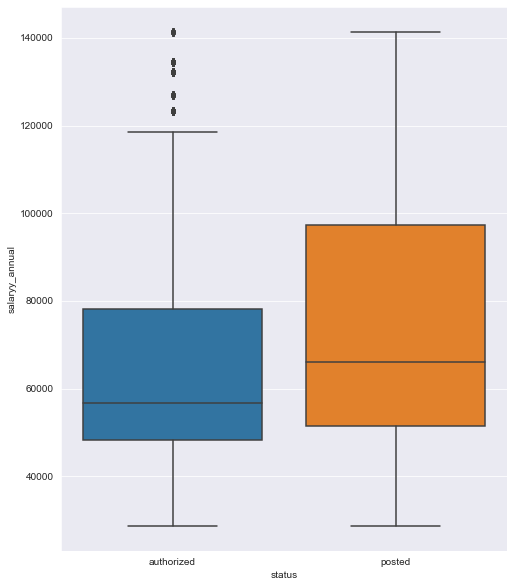

In [377]:
#Status of card transactions and annual salary
plt.figure(figsize=(8,10))
sns.boxplot(x='status',y='salaryy_annual',data=final_df)

Authorized transactions refers to those transactions that are yet to be settled by the service provider, kind of pending charge or hold of the payment in order to guarantee that the client’s account has a sufficient sum of funds which can cover the price of the product/service. whereas posted transactions are 100% complete

As the annual salary increases, more observations are classified under posted or transactions that are settled instantly, safe accounts. While higher proportion of authorized transaction lies in the range of around 58,000-78,000 pa. Overall dataset has more observations on the posted transaction side.Maximum salary classified under authorized stands at 120,000 pa.

<AxesSubplot:xlabel='card_present_flag', ylabel='salaryy_annual'>

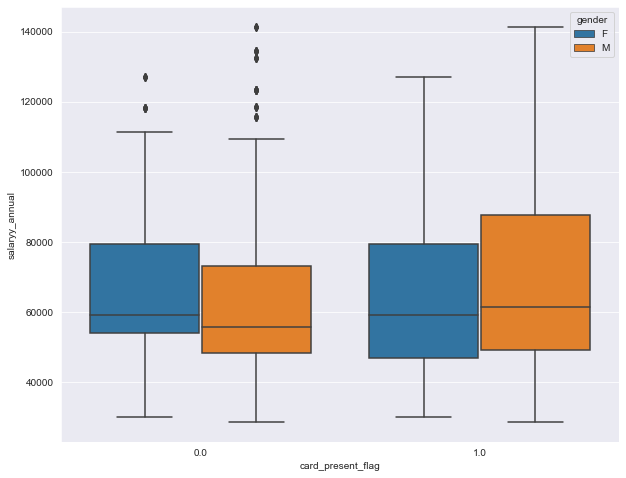

In [378]:
#Flagged card transactions and annual salary
plt.figure(figsize=(10,8))
sns.boxplot(x='card_present_flag',y='salaryy_annual',data=final_df,hue='gender')

Grpahical representation of flagged/ non flagged transactions with annual salaries,classified by gender.   
Suspicious transactions are flagged whereas safe transactions are not flagged.The proportion of flagged transactions is higher than non flagged. Range of salaries for flagged transactions is higher, showing higher variability. 

# Derived attribute from the Dataset

In [379]:
#Average expenditure by each customer
avg_exp=transact.groupby('customer_id')['amount'].mean()
avg_exp=pd.Series(avg_exp)
avg_exp=pd.to_numeric(avg_exp)
avg_exp=pd.DataFrame(avg_exp)
avg_exp = pd.DataFrame(avg_exp).reset_index()
avg_exp.columns = ['customer_id', 'Mean_Exp']

In [380]:
final_dff=pd.merge(final_df, avg_exp, on="customer_id")

In [381]:
final_dff

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,...,movement,salaryy_annual,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,M,posted,Mean_Exp
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,...,debit,56765.52,0,0,0,1,0,0,0,45.348772
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,...,debit,56765.52,0,0,0,0,1,0,0,45.348772
2,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,...,debit,56765.52,0,0,0,1,0,1,0,45.348772
3,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,3.85,2018-08-01,F,26,...,debit,56765.52,0,0,0,0,1,0,0,45.348772
4,posted,1.0,ACC-1598451071,153.41 -27.95,PAY/SALARY,Diana,1017.52,2018-08-01,F,26,...,credit,56765.52,0,0,0,0,1,0,0,45.348772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,posted,1.0,ACC-240804743,121.48 -30.75,PAY/SALARY,Kenneth,24929.99,2018-10-29,M,29,...,credit,123348.40,0,0,0,1,0,0,0,274.523358
12039,posted,1.0,ACC-240804743,121.48 -30.75,PHONE BANK,Kenneth,24886.99,2018-10-30,M,29,...,debit,123348.40,0,0,0,0,1,1,0,274.523358
12040,authorized,1.0,ACC-240804743,121.48 -30.75,SALES-POS,Kenneth,24870.66,2018-10-30,M,29,...,debit,123348.40,0,0,0,1,0,1,0,274.523358
12041,posted,1.0,ACC-240804743,121.48 -30.75,PAYMENT,Kenneth,24814.66,2018-10-31,M,29,...,debit,123348.40,0,0,0,0,1,1,0,274.523358


In [382]:
#final_dff[['Flag','Not_Flagged']]=pd.get_dummies(final_dff['card_present_flag']
final_dff['Flagged']=pd.get_dummies(final_dff['card_present_flag'],drop_first=True)
final_dff['debit']=pd.get_dummies(final_dff['movement'],drop_first=True)

In [383]:
final_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    12043 non-null  object        
 11  merchant_state     12043 non-null  object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  custom

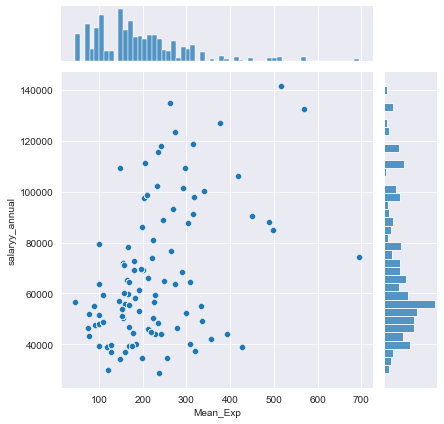

In [384]:
#Direct Relationship between mean expenditure and annual salary
sns.jointplot(x='Mean_Exp',y='salaryy_annual',data=final_dff)

In [385]:
final_dff['salaryy_annual'].corr(final_dff['Mean_Exp'])

0.5420431540866734

In [386]:
final_dff['amount'].corr(final_dff['Mean_Exp'])

0.16827597446026038

Average expenditure per customer over the period of analysis has a positive correlation with customer's annual salary and hence should be considered as one predictor variable. Correlation between amount and average expedniture exist but is below the threshold for multicollinearity. Thus both the variables can be considered

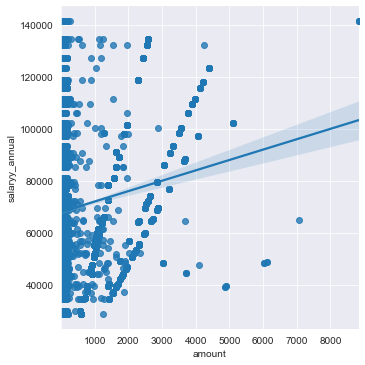

In [387]:
sns.lmplot(x='amount',y='salaryy_annual',data=final_dff)

# Predictive Analysis

# Linear Regression

Just for the task, however not a good algorithm to predict salary in this case

In [388]:
from sklearn.linear_model import LinearRegression

In [389]:
lr=LinearRegression(normalize=True)

In [390]:
final_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    12043 non-null  object        
 11  merchant_state     12043 non-null  object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  custom

In [391]:
X= final_dff[['age','M','Mean_Exp','balance','Flagged','debit','amount','posted']]
y= final_dff['salaryy_annual']

In [392]:
#Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
ddf=add_constant(X)
pd.Series([variance_inflation_factor(ddf.values,i)
           for i in range(ddf.shape[1])],
         index=ddf.columns)

const       67.156904
age          1.064725
M            1.003810
Mean_Exp     1.145876
balance      1.126493
Flagged      1.015125
debit        2.977706
amount       3.014190
posted       1.003872
dtype: float64

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [395]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [396]:
predictions=lr.predict(X_test)

In [397]:
lr.score(X_test,y_test)

0.33692310777053913

In [398]:
#R squared, prediction explains 33% variability of y_test
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.33692310777053913

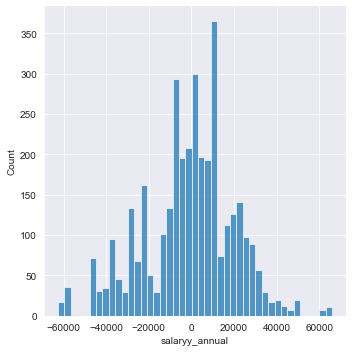

In [399]:
#Distribution of error terms: normal
d=pd.Series(predictions-y_test)
sns.displot(d)

# Decision Tree Classifier

In [400]:
from sklearn.tree import DecisionTreeRegressor

In [401]:
dtree= DecisionTreeRegressor()

In [402]:
#desc.corr()

In [403]:
#Tree algorithms are robust to outliers
X1= final_dff[['age','M','balance','posted','Flagged','debit','amount','POS','SALES-POS','PAYMENT','PHONE BANK']]
y1=final_dff['salaryy_annual']

In [404]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.3)

In [405]:
dtree.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [406]:
prediction=dtree.predict(X1_test)

In [407]:
dtree.score(X1_test,y1_test)

0.5544790973859308

In [408]:
dtree.score(X1_test,y1_test)

0.5544790973859308

In [409]:
from sklearn.metrics import r2_score
r2_score(y1_test,prediction)

0.5544790973859308

Decision Tree is a better model as compared to Linear Regression to predict annual salary of the customers because of tree algorithms are robust to outliers

In [410]:
y1_test.reset_index(drop=True,inplace=True)
y1_test=pd.DataFrame(y1_test)
y1_test

,salaryy_annual
0,59217.08
1,47707.40
2,34415.52
3,106001.84
4,34415.52
...,...
3608,49218.96
3609,50464.44
3610,42187.44
3611,46388.68


In [411]:
#Predictions
pred1=pd.DataFrame(prediction,columns=['Prediction'])
pred1

,Prediction
0,55687.20
1,47707.40
2,34415.52
3,106001.84
4,34415.52
...,...
3608,49218.96
3609,50464.44
3610,42187.44
3611,46388.68


In [412]:
#Prediction versus actual y
results1=pd.concat([pred1,y1_test],axis=1)
results1
results1=pd.DataFrame(results1)
results1

,Prediction,salaryy_annual
0,55687.20,59217.08
1,47707.40,47707.40
2,34415.52,34415.52
3,106001.84,106001.84
4,34415.52,34415.52
...,...,...
3608,49218.96,49218.96
3609,50464.44,50464.44
3610,42187.44,42187.44
3611,46388.68,46388.68
